In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, Resizing
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

%matplotlib inline

2024-04-14 09:52:09.474901: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 09:52:09.475008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 09:52:09.727559: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_path = '/kaggle/input/brain-tumor/Brain-Tumor-Classification-DataSet-master/Training'
test_path = '/kaggle/input/brain-tumor/Brain-Tumor-Classification-DataSet-master/Testing'

In [3]:
X_train = []
y_train = []
img_size = (300,300)

In [4]:
for folder in os.listdir(train_path):
    print(f"In folder: {folder}")
    for file in os.listdir(os.path.join(train_path,folder)):
        img_path = os.path.join(train_path,folder,file)
        img  = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        X_train.append(img)
        y_train.append(folder)

In folder: no_tumor
In folder: pituitary_tumor
In folder: meningioma_tumor
In folder: glioma_tumor


In [5]:
for folder in os.listdir(test_path):
    print(f"In folder: {folder}")
    for file in os.listdir(os.path.join(test_path,folder)):
        img_path = os.path.join(test_path,folder,file)
        img  = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        X_train.append(img)
        y_train.append(folder)

In folder: no_tumor
In folder: pituitary_tumor
In folder: meningioma_tumor
In folder: glioma_tumor


In [6]:
X_train = np.array(X_train, dtype='float32')

In [7]:
X_train = X_train / 255.0

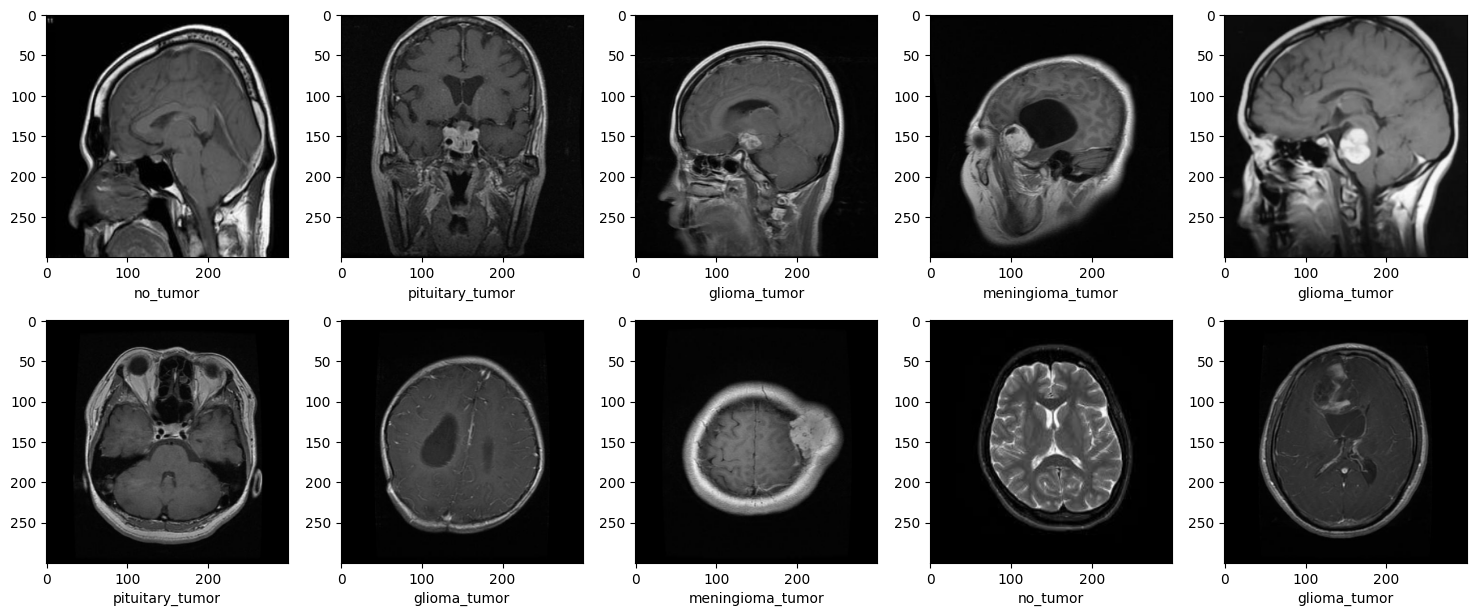

In [8]:
plt.figure(figsize=(15, 15))

random_indices = np.random.choice(len(X_train), size=10, replace=False)
for i, idx in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.xlabel(y_train[idx])
    plt.tight_layout()
plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [10]:
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=False,
        vertical_flip=False,
        fill_mode='nearest')

In [11]:
datagen.fit(X_train)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
# One-Hot Encoding
y_train = np.array(pd.get_dummies(y_train))

In [14]:
#Splitting Data into training, testing and validation
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [15]:
print(f'X_train shape: {(X_train).shape}\n'
      f'y_train shape: {(y_train).shape}\n'
      f'X_test shape: {(X_test).shape}\n'
      f'y_test shape: {(y_test).shape}\n'
      f'X_valid shape: {(X_valid).shape}\n'
      f'y_valid shape: {(y_valid).shape}')

X_train shape: (2643, 300, 300, 3)
y_train shape: (2643, 4)
X_test shape: (327, 300, 300, 3)
y_test shape: (327, 4)
X_valid shape: (294, 300, 300, 3)
y_valid shape: (294, 4)


In [16]:
print(f"Maximum and Minimum pixel value after normalization: {X_train.max()} - {X_train.min()}")

Maximum and Minimum pixel value after normalization: 1.0 - 0.0


In [17]:
input_shape = X_train.shape
print(input_shape)

(2643, 300, 300, 3)


In [18]:
height, width, _ = X_train.shape[1:]
print("Width:", width)
print("Height:", height)

Width: 300
Height: 300


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, AveragePooling2D, Flatten, Dense, Resizing

currently not going for leNet direct to ResNet

In [20]:
# Create LeNet-5 model
lenet_model = Sequential([
    # Resizing layer
    Resizing(32, 32, interpolation='bilinear', input_shape=(width, height, 3)),

    # 1st Layer
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid', input_shape=(width, height, 3)),
    BatchNormalization(),
    # 2nd Layer
    AveragePooling2D(pool_size=(2, 2)),

    # 3rd Layer
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'),
      BatchNormalization(),
    # 4th Layer
    AveragePooling2D(pool_size=(2, 2)),


    Flatten(),

    # 5th Layer
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(4, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
lenet_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 6)      │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,584 (240.56 KB)

 Trainable params: 61,540 (240.39 KB)

 Non-trainable params: 44 (176.00 B)

In [22]:
# Compile the model
lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = lenet_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
 7/42 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3403 - loss: 1.4765

I0000 00:00:1713088429.622308      92 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 243ms/step - accuracy: 0.5044 - loss: 1.1650 - val_accuracy: 0.4592 - val_loss: 1.3304
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7277 - loss: 0.7125 - val_accuracy: 0.4116 - val_loss: 1.2411
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8130 - loss: 0.5117 - val_accuracy: 0.3673 - val_loss: 1.2426
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8660 - loss: 0.3908 - val_accuracy: 0.4082 - val_loss: 1.2788
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8973 - loss: 0.3134 - val_accuracy: 0.5476 - val_loss: 1.0376
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9265 - loss: 0.2413 - val_accuracy: 0.5816 - val_loss: 1.1500
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9413 - loss: 0.1850 - val_accuracy: 0.6259 - val_loss: 0.8600
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9550 - loss: 0.1429 - val_accuracy: 0.6905 - val_loss: 

In [24]:
from sklearn.metrics import recall_score

y_test_labels = np.argmax(y_test, axis=1)

# Make predictions on the test dataset
y_pred = lenet_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate recall score
recall = recall_score(y_test_labels, y_pred_classes, average='weighted')

# Print the recall score
print('Recall Score:', recall)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step
Recall Score: 0.8960244648318043


In [25]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = lenet_model.evaluate(X_test, y_test, verbose=1)

# Print the test accuracy
print('Test Accuracy:', test_accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8932 - loss: 0.4434
Test Accuracy: 0.8960244655609131


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        79
           1       0.91      0.79      0.85        90
           2       0.96      0.88      0.91        73
           3       0.94      1.00      0.97        85

    accuracy                           0.90       327
   macro avg       0.90      0.90      0.90       327
weighted avg       0.90      0.90      0.90       327



In [27]:
class_names = []
for folder in os.listdir(train_path):
    class_names.append(folder)

class_names

['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']

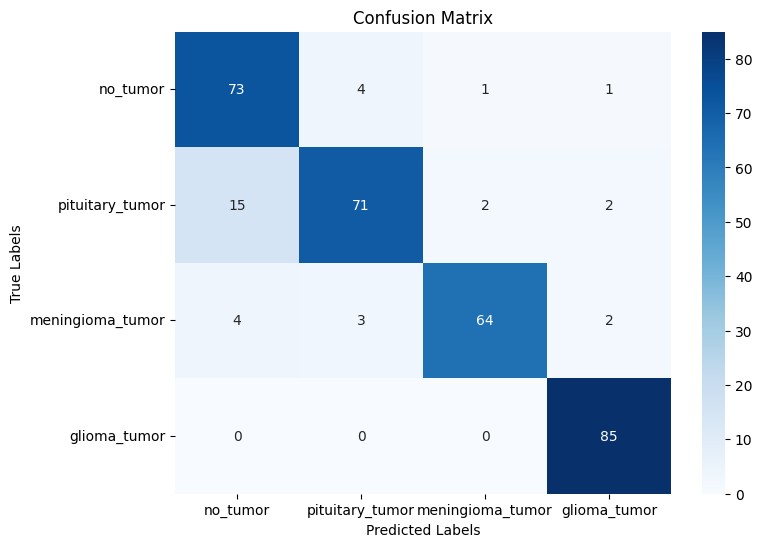

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
base_model = MobileNetV3Small(input_shape=(width, height, 3), include_top=False, weights='imagenet')

/opt/conda/lib/python3.10/site-packages/keras/src/applications/mobilenet_v3.py:449: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
base_model.trainable = False


In [31]:
num_classes = 4

In [32]:
top_layers = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [33]:
top_layers.compile(optimizer=Adam(),
                   loss=SparseCategoricalCrossentropy(),
                   metrics=[SparseCategoricalAccuracy()])

In [34]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy

# Compile the model with binary crossentropy loss function
top_layers.compile(optimizer=Adam(),
                   loss=BinaryCrossentropy(),
                   metrics=[BinaryAccuracy()])

# Train the model
history = top_layers.fit(X_train, y_train,
                         epochs=10,
                         batch_size=64,
                         validation_data=(X_valid, y_valid))


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - binary_accuracy: 0.6549 - loss: 7.3424

W0000 00:00:1713088510.014100      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


42/42 ━━━━━━━━━━━━━━━━━━━━ 40s 543ms/step - binary_accuracy: 0.6557 - loss: 7.2515 - val_binary_accuracy: 0.7500 - val_loss: 0.6437
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - binary_accuracy: 0.7486 - loss: 0.6392 - val_binary_accuracy: 0.7500 - val_loss: 0.6038
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - binary_accuracy: 0.7500 - loss: 0.6227 - val_binary_accuracy: 0.7500 - val_loss: 0.5770
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - binary_accuracy: 0.7500 - loss: 0.6109 - val_binary_accuracy: 0.7500 - val_loss: 0.5782
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - binary_accuracy: 0.7500 - loss: 0.6082 - val_binary_accuracy: 0.7500 - val_loss: 0.5636
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - binary_accuracy: 0.7500 - loss: 0.6065 - val_binary_accuracy: 0.7500 - val_loss: 0.5768
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - binary_accuracy: 0.7500 - loss: 0.5986 - val_binary_accuracy: 0.7500 - val_loss: 0.5759
Epoch 8/10
42/42 ━━━━━

In [35]:
loss, accuracy = top_layers.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - binary_accuracy: 0.7500 - loss: 0.5838

W0000 00:00:1713088553.362977      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 577ms/step - binary_accuracy: 0.7500 - loss: 0.5832
Test Loss: 0.58387690782547, Test Accuracy: 0.75


W0000 00:00:1713088559.132294      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [36]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.optimizers import Adam


In [37]:
input_shape = (width,height, 3)

In [38]:
import tensorflow as tf

# Set memory growth for GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


Physical devices cannot be modified after being initialized


In [39]:
# Load ResNet50V2
resnet50v2_model = Sequential([
    ResNet50V2(include_top=False, weights='imagenet', input_shape=input_shape),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Changed to 1 neuron for binary classification
])

# Compile ResNet50V2 model
resnet50v2_model.compile(optimizer=Adam(),
                          loss=BinaryCrossentropy(),
                          metrics=[BinaryAccuracy()])
import numpy as np

# Convert one-hot encoded labels to binary labels
y_train_binary = np.argmax(y_train, axis=1)
y_valid_binary = np.argmax(y_valid, axis=1)

# Train ResNet50V2 model
resnet50v2_history = resnet50v2_model.fit(X_train, y_train_binary,
                                          epochs=10,
                                          batch_size=8,
                                          validation_data=(X_valid, y_valid_binary))




94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 165s 289ms/step - binary_accuracy: 0.2887 - loss: -23351.4707 - val_binary_accuracy: 0.3163 - val_loss: -518.1035
Epoch 2/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 48s 146ms/step - binary_accuracy: 0.2856 - loss: -830826.5625 - val_binary_accuracy: 0.3163 - val_loss: -614901.2500
Epoch 3/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 48s 145ms/step - binary_accuracy: 0.2926 - loss: -9914647.0000 - val_binary_accuracy: 0.3163 - val_loss: -5570701.0000
Epoch 4/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 48s 146ms/step - binary_accuracy: 0.2804 - loss: -46594652.0000 - val_binary_accuracy: 0.3163 - val_loss: -301587168.0000
Epoch 5/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 48s 145ms/step - binary_accuracy: 0.3041 - loss: -132661256.0000 - val_binary_accuracy: 0.3163 - val_loss: -311226880.0000
Epoch 6/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 48s 145ms/step - binary_accuracy: 0.2765 - loss: -277730720.0000 - val_binary_accuracy: 0.3163 - val_loss: -792996

ValueError: Unable to synchronously create dataset (name already exists)

In [41]:
# Save ResNet50V2 model
resnet50v2_model.save('resnet50v2_brain_tumor_model_keshav.h5')

ValueError: Unable to synchronously create dataset (name already exists)

In [52]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have already trained your model and obtained predictions
# Replace y_pred with your model's predictions on the validation data
y_pred = resnet50v2_model.predict(X_valid)
y_pred_binary = np.round(y_pred).flatten()

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_valid_binary, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 485ms/step
Confusion Matrix:
[[ 0 73  0  0]
 [ 0 93  0  0]
 [ 0 40  0  0]
 [ 0 88  0  0]]


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step


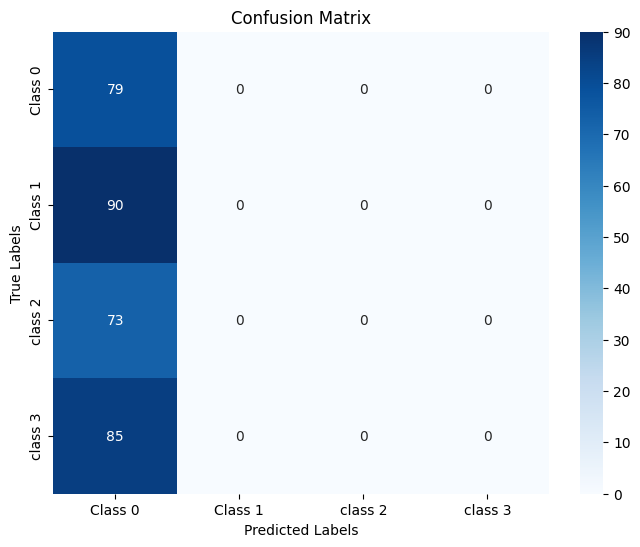

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and obtained predictions
# Replace y_pred with your model's predicted probabilities on the test data
# Replace y_test_labels with the true labels of the test data
y_pred = resnet50v2_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)  # Assuming one-hot encoded labels

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes)

# Define class names if needed
class_names = ['Class 0', 'Class 1','class 2' ,'class 3']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


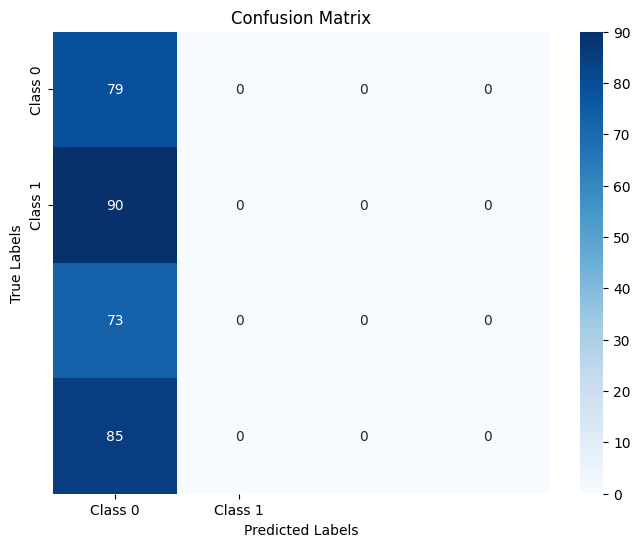

In [55]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, Resizing

In [43]:
alexnet_model = Sequential([
            # Resizing
            Resizing(227,227, interpolation='bilinear', input_shape=(width,height,3)),
    
            #1st Convolutional Layer
            Conv2D(filters=96,kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
            BatchNormalization(),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
            
            #2nd Convolutional Layer
            Conv2D(filters=256,kernel_size=(5,5), strides=(1,1), padding='same', activation='relu' ),
            BatchNormalization(),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                #3rd Convolutional Layer
            Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
            BatchNormalization(),
                
            #4th Convolutional Layer
            Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
            BatchNormalization(),        
            
            #4th Convolutional Layer
            Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
            BatchNormalization(),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                     
            Flatten(),
                      Dense(4096, activation='relu'),
            Dropout(0.5),
            
            Dense(4096, activation='relu'),
            Dropout(0.5),
                     
            Dense(4, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [44]:
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
history = lenet_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9992 - loss: 0.0057 - val_accuracy: 0.8980 - val_loss: 0.4282
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9993 - loss: 0.0083 - val_accuracy: 0.9082 - val_loss: 0.4900
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9973 - loss: 0.0062 - val_accuracy: 0.9048 - val_loss: 0.4645
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9999 - loss: 0.0023 - val_accuracy: 0.9048 - val_loss: 0.4904
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9990 - loss: 0.0067 - val_accuracy: 0.9150 - val_loss: 0.4292
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9991 - loss: 0.0047 - val_accuracy: 0.9048 - val_loss: 0.4847
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9983 - loss: 0.0037 - val_accuracy: 0.8946 - val_loss: 0.5275
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9150 - v

In [46]:
test_loss, test_accuracy = lenet_model.evaluate(X_test, y_test, verbose=1)

# Print the test accuracy
print('Test Accuracy:', test_accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9016 - loss: 0.4691
Test Accuracy: 0.9021406769752502


In [47]:
y_test_labels = np.argmax(y_test, axis=1)

# Make predictions on the test dataset
y_pred = lenet_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate recall score
recall = recall_score(y_test_labels, y_pred_classes, average='weighted')

# Print the recall score
print('Recall Score:', recall)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Recall Score: 0.9021406727828746


In [48]:
print(classification_report(y_test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        79
           1       0.95      0.78      0.85        90
           2       0.93      0.93      0.93        73
           3       0.97      1.00      0.98        85

    accuracy                           0.90       327
   macro avg       0.91      0.91      0.90       327
weighted avg       0.91      0.90      0.90       327



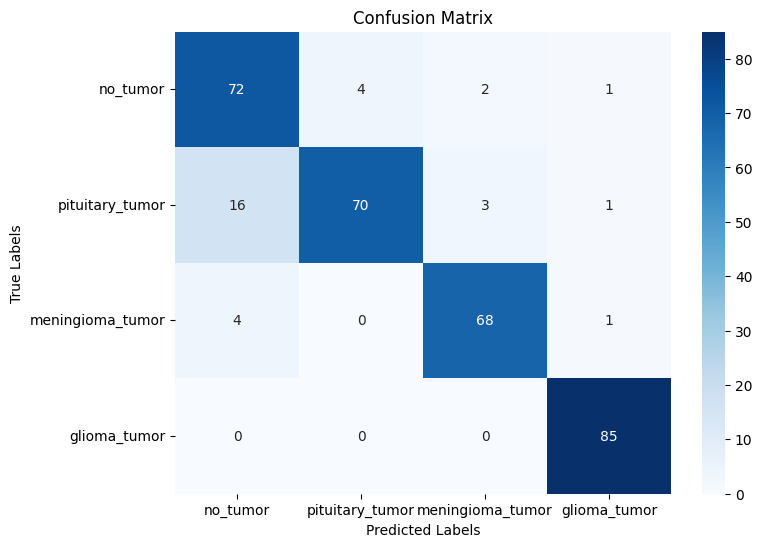

In [49]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [50]:
# Save LeNet-5 model
lenet_model.save('lenet_model.h5')

# Save AlexNet model
alexnet_model.save('alexnet_model.h5')

print("Models saved successfully.")


Models saved successfully.


In [59]:
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy

# Load InceptionV3
inception_model = Sequential([
    InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='sigmoid')
])

# Compile InceptionV3 model
inception_model.compile(optimizer=Adam(),
                        loss=BinaryCrossentropy(),
                        metrics=[BinaryAccuracy()])

# Train InceptionV3 model (replace X_train, y_train, X_valid, y_valid with actual data)
inception_history = inception_model.fit(X_train, y_train,
                                        epochs=10,
                                        batch_size=32,
                                        validation_data=(X_valid, y_valid))


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - binary_accuracy: 0.7787 - loss: 2.2185 - val_binary_accuracy: 0.6318 - val_loss: 2713.7808
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 34s 414ms/step - binary_accuracy: 0.9130 - loss: 0.2309 - val_binary_accuracy: 0.7993 - val_loss: 11.1649
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 34s 409ms/step - binary_accuracy: 0.9198 - loss: 0.2356 - val_binary_accuracy: 0.6318 - val_loss: 143.5780
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 34s 407ms/step - binary_accuracy: 0.9377 - loss: 0.1802 - val_binary_accuracy: 0.7330 - val_loss: 8.4975
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 34s 411ms/step - binary_accuracy: 0.9583 - loss: 0.1268 - val_binary_accuracy: 0.7917 - val_loss: 2.9667
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 34s 409ms/step - binary_accuracy: 0.9763 - loss: 0.0769 - val_binary_accuracy: 0.8716 - val_loss: 1.2444
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 34s 409ms/step - binary_accuracy: 0.9666 - loss: 

In [62]:
inception_model.save('inception_brain_tumor_model.h5')

ValueError: Unable to synchronously create dataset (name already exists)

In [64]:
# Import VGG16 from tensorflow.keras.applications
from tensorflow.keras.applications import VGG16

# Load VGG16
vgg16_model = Sequential([
    VGG16(include_top=False, weights='imagenet', input_shape=input_shape),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='sigmoid')
])

# Compile VGG16 model
vgg16_model.compile(optimizer=Adam(),
                     loss=BinaryCrossentropy(),
                     metrics=[BinaryAccuracy()])

# Train VGG16 model (replace X_train, y_train, X_valid, y_valid with actual data)
vgg16_history = vgg16_model.fit(X_train, y_train,
                                epochs=10,
                                batch_size=32,
                                validation_data=(X_valid, y_valid))

# Save VGG16 model
vgg16_model.save('vgg16_brain_tumor_model.h5')


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


2024-04-14 10:34:01.575347: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,300,300]{3,2,1,0}, f32[32,64,300,300]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-04-14 10:34:07.161793: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 6.58662458s
Trying algorithm eng0{} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,300,300]{3,2,1,0}, f32[32,64,300,300]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-04-14 10:34:12.290900: E external/l

82/83 ━━━━━━━━━━━━━━━━━━━━ 0s 689ms/step - binary_accuracy: 0.7198 - loss: 0.9203

2024-04-14 10:36:47.292256: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[19,64,300,300]{3,2,1,0}, f32[19,64,300,300]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-04-14 10:36:50.103628: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 3.81149188s
Trying algorithm eng0{} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[19,64,300,300]{3,2,1,0}, f32[19,64,300,300]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-04-14 10:36:53.571218: E external/l

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - binary_accuracy: 0.7200 - loss: 0.9173   

W0000 00:00:1713091041.157410      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - binary_accuracy: 0.7203 - loss: 0.9143 - val_binary_accuracy: 0.7500 - val_loss: 0.5558
Epoch 2/10


W0000 00:00:1713091056.105756      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 59s 712ms/step - binary_accuracy: 0.7500 - loss: 0.5586 - val_binary_accuracy: 0.7500 - val_loss: 0.5583
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 59s 712ms/step - binary_accuracy: 0.7500 - loss: 0.5617 - val_binary_accuracy: 0.7500 - val_loss: 0.5601
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 59s 712ms/step - binary_accuracy: 0.7498 - loss: 0.5600 - val_binary_accuracy: 0.7449 - val_loss: 0.5712
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 59s 713ms/step - binary_accuracy: 0.7466 - loss: 0.5657 - val_binary_accuracy: 0.7500 - val_loss: 0.5567
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 59s 705ms/step - binary_accuracy: 0.7461 - loss: 0.5549 - val_binary_accuracy: 0.7500 - val_loss: 0.5535
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 58s 701ms/step - binary_accuracy: 0.7500 - loss: 0.5588 - val_binary_accuracy: 0.7500 - val_loss: 0.5510
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 58s 701ms/step - binary_accuracy: 0.7500 - loss: 0.5554 - val_binary_accuracy: 0.7500 - val_loss: 0.5511
Epoch 9/10

ValueError: Unable to synchronously create dataset (name already exists)

In [61]:
# Assuming you have already trained your model and obtained predictions
# Replace X_test with your test data
y_pred_probs = inception_model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)  # Assuming binary classification with a threshold of 0.5

# If you're doing multi-class classification, you might want to use argmax to get the predicted class index
# y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Replace y_test_labels with the true labels of the test data
y_test_labels = np.argmax(y_test, axis=1)  # Assuming one-hot encoded labels

# Calculate recall score
recall = recall_score(y_test_labels, y_pred_classes)

print("Recall Score:", recall)


11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step 


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [ ]:
import cv2

# Prompt user for input image file path
image_path = input("Enter the path of the image to classify:")

# Load and preprocess the input image
input_image = cv2.imread(image_path)
input_image = cv2.resize(input_image, img_size)  # Assuming img_size is defined earlier
input_image = input_image.astype('float32') / 255.0  # Normalize pixel values

# Reshape input image according to model's input shape
input_image = np.expand_dims(input_image, axis=0)

# Make prediction using the trained model
prediction = lenet_model.predict(input_image)

# Get the class label with the highest probability
predicted_class = np.argmax(prediction)

# Define class labels
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Print the predicted class label
print("Predicted Tumor Type:", class_labels[predicted_class])
